# Fire up pandas

In [45]:
import pandas as pd

# Load some house sales data

In [46]:
import graphlab as gl

In [47]:
sf = gl.SFrame('home_data.gl')

In [48]:
sf.save('home_data.csv' , format = 'csv')

In [49]:
df = pd.read_csv('home_data.csv')

In [50]:
sales = df

In [51]:
sales.head()

id             date   price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900         3       1.00         1180   
1  6414100192  20141209T000000  538000         3       2.25         2570   
2  5631500400  20150225T000000  180000         2       1.00          770   
3  2487200875  20141209T000000  604000         4       3.00         1960   
4  1954400510  20150218T000000  510000         3       2.00         1680   

   sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
0      5650     1.0           0     0     ...          7        1180   
1      7242     2.0           0     0     ...          7        2170   
2     10000     1.0           0     0     ...          6         770   
3      5000     1.0           0     0     ...          7        1050   
4      8080     1.0           0     0     ...          8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   
2              0      1933             0    98028  47.7379 -122.233   
3            910      1965             0    98136  47.5208 -122.393   
4              0      1987             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

# Exploring the data for housing sales

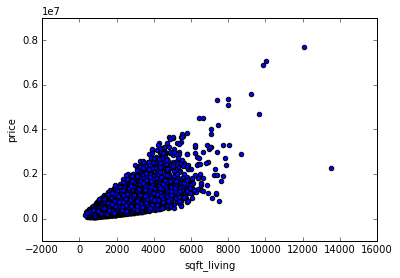

In [53]:
% matplotlib inline
sales.plot.scatter(x="sqft_living", y="price")

In [11]:
import matplotlib.pyplot as plt

# Create a simple regression model of sqft_living to price

In [54]:
import sklearn
from sklearn.cross_validation import train_test_split

In [90]:
train, test = train_test_split(sales, test_size=0.2, random_state=4)

## Build the regression model

In [91]:
from sklearn.linear_model import LinearRegression

In [92]:
sqft_model = LinearRegression()

In [93]:
sqft_model.fit(train["sqft_living"].reshape(-1, 1), train["price"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [94]:
train["sqft_living"].describe()

count    17290.000000
mean      2077.868479
std        921.262768
min        290.000000
25%       1420.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

In [95]:
train["price"].describe()

count    1.729000e+04
mean     5.397627e+05
std      3.689754e+05
min      7.500000e+04
25%      3.200000e+05
50%      4.500000e+05
75%      6.430000e+05
max      7.700000e+06
Name: price, dtype: float64

# Evaluate the simple model

In [96]:
print test["price"].mean()

541389.745316


In [97]:
predicted = sqft_model.predict(test[["sqft_living"]])

In [98]:
y_true = test[["price"]]

In [99]:
from sklearn import metrics

In [100]:
from math import sqrt
sqrt(metrics.mean_squared_error(y_true = y_actual, y_pred = predicted))

465009.89306683384

# Plotting predictions using matplotlib

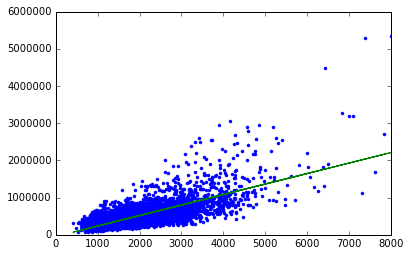

In [101]:
plt.plot(test['sqft_living'], test['price'], '.',
        test['sqft_living'], predicted, '-')

In [102]:
print sqft_model.intercept_
print sqft_model.coef_

-45850.7658723
[ 281.83375186]


# Explore other features in the data

In [103]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [104]:
my_features_model = LinearRegression()

In [105]:
x = train[my_features]
y = train[["price"]]

In [106]:
my_features_model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [107]:
test_x = test[my_features]

In [108]:
predicted = my_features_model.predict(test_x)

In [109]:
y_true = test["price"]

In [110]:
sqrt(metrics.mean_squared_error(y_true=y_true, y_pred=predicted))

253616.2788046772

# Apply learned models to predict prices of 3 houses

In [127]:
house1 = sales.loc[sales['id']==5309101200]

In [126]:
house1

id             date   price  bedrooms  bathrooms  sqft_living  \
1054  5309101200  20140605T000000  620000         4       2.25         2400   

      sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
1054      5350     1.5           0     0     ...          7        1460   

      sqft_basement  yr_built  yr_renovated  zipcode      lat    long  \
1054            940      1929             0    98117  47.6763 -122.37   

      sqft_living15  sqft_lot15  
1054           1250        4880  

[1 rows x 21 columns]

In [132]:
print house1['price']

1054    620000
Name: price, dtype: int64


In [138]:
print sqft_model.predict(house1['sqft_living'].reshape(1, -1))

[ 630550.2386005]


In [139]:
print my_features_model.predict(house1[my_features])

[[ 632654.58990417]]


## Prediction for a second, fancier house

In [140]:
house2 = sales[sales['id']==1925069082]

In [141]:
house2

id             date    price  bedrooms  bathrooms  sqft_living  \
1361  1925069082  20150511T000000  2200000         5       4.25         4640   

      sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
1361     22703     2.0           1     4     ...          8        2860   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
1361           1780      1952             0    98052  47.6393 -122.097   

      sqft_living15  sqft_lot15  
1361           3140       14200  

[1 rows x 21 columns]

In [142]:
sqft_model.predict(house2['sqft_living'].reshape(1, -1))

array([ 630550.2386005])

In [144]:
my_features_model.predict(house2[my_features])

array([[ 1267903.07129358]])